In [97]:
# ! pip install -U numpy
# ! pip install -U scipy
# ! pip install ipympl

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from scipy import signal
from scipy.fft import fftshift, fft, fftfreq
from random import randint
%matplotlib widget

In [99]:
def plot(*args, y=None, stem=False) -> None:
    ax = plt.figure()
    if y is None:
        for y in args:
            x = np.arange(y.size)
            if stem:
                plt.stem(x, y)
            else:
                plt.plot(x, y)
    else:
        if stem:
            plt.stem(args[0], y)
        else:
            plt.plot(args[0], y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

In [100]:
def plot_scalogram(wavelet_coeficients: np.ndarray) -> None:
    xlist = ylist = np.arange(0, wavelet_coeficients.shape[0])
    X, Y = np.meshgrid(xlist, ylist)
    Z = wavelet_coeficients
    fig, ax = plt.subplots(1, 1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp, label='Значения вейвлет-коэффициентов')
    ax.set_ylabel('Ряды')
    ax.set_xlabel('Отсчёты')
    plt.show()

## Непрервыное вейвлет-преобразование дискретных сигналов


In [101]:
def mexican_hat(t: np.ndarray):
    return np.exp((-1) * np.power(t, 2) / 2) * (1 - t ** 2)

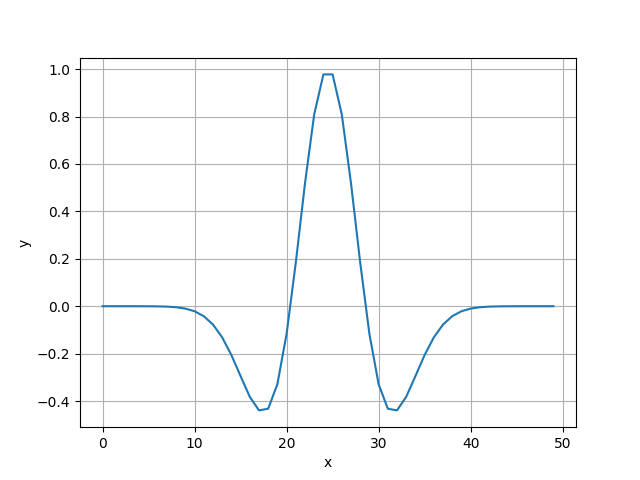

In [102]:
t = np.linspace(start=-6, stop=6)
plot(mexican_hat(t))

In [103]:
def y(x: np.ndarray) -> np.ndarray:
    result = np.zeros(x.size)
    for idx in range(result.size):
        if x[idx] < np.pi:
            result[idx] = np.sin(0.5 * 2 * np.pi * x[idx])
        else:
            result[idx] = np.sin(0.8 * 2 * np.pi * x[idx])
    return result

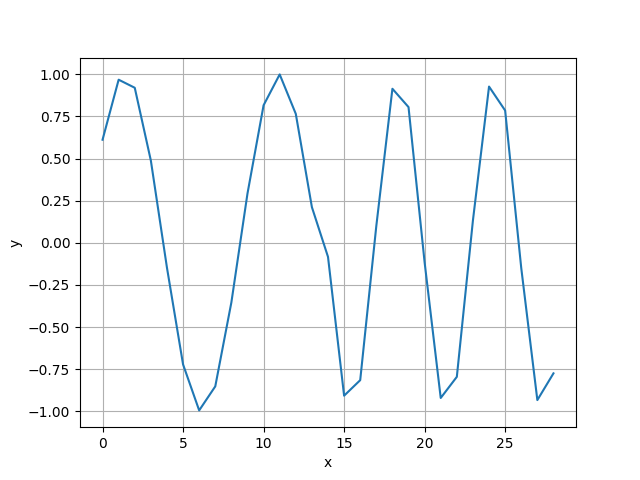

In [104]:
N = 30
x = np.arange(start=1, stop=30)
signal = y(x * (2 * np.pi / N))
plot(signal)

In [105]:
def wavelet_transform(signal: np.ndarray,
                      psi_func: Callable):
    dt = 2 * np.pi / signal.size

    def wavelet_transform_array(a: float):

        def wavelet_transform_element(b: float):
            result_sum = np.zeros(signal.size)
            for idx in range(result_sum.size):
                result_sum[idx] = signal[idx] * psi_func(((idx + 1) * dt - b) / a)
            return np.sum(result_sum)

        result_array = np.zeros(signal.size)
        for idx in range(result_array.size):
            result_array[idx] = wavelet_transform_element((idx + 1) * dt)
        return result_array

    result = []
    for k in range(signal.size):
        result.append(wavelet_transform_array((k + 1) * dt))
    return np.array(result)

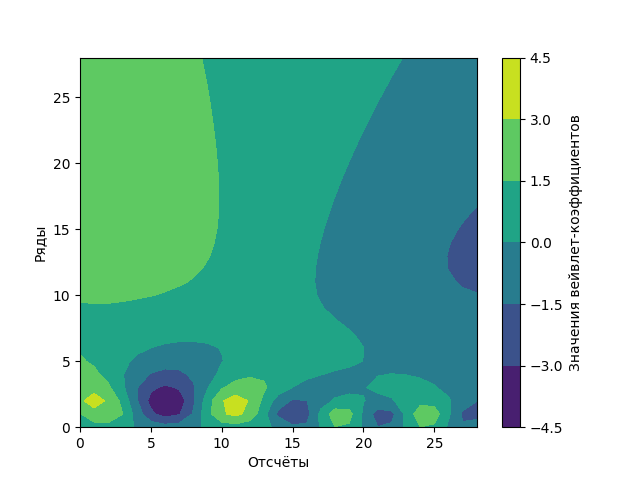

In [106]:
plot_scalogram(wavelet_transform(signal, mexican_hat))

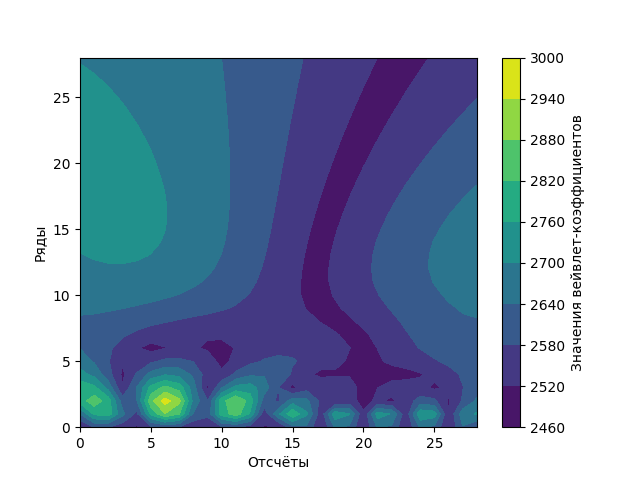

In [107]:
plot_scalogram(np.power(np.abs(wavelet_transform(signal, mexican_hat)) + 50, 2))

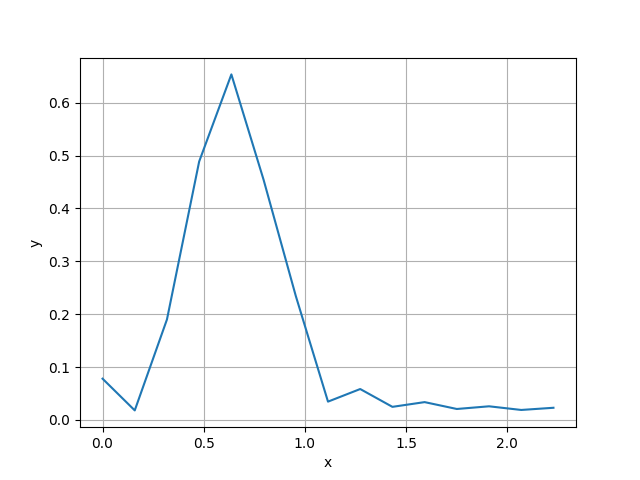

In [108]:
N = 30
T = (2 * np.pi / N)
x = np.linspace(0.0, N * T, N, endpoint=False)
yf = fft(y(x))
xf = fftfreq(N, T)[:N // 2]
plot(xf, y=2.0 / N * np.abs(yf[0:N // 2]))